In [ ]:
#https://github.com/PPPW/deep-learning-random-explore/blob/master/CNN_archs/cnn_archs.ipynb

In [1]:
from fastai.vision.all import *

In [2]:
torch.cuda.is_available()

True

In [3]:
source = f'/home/oem/Images/dataset_fridge'
#source = r'C:\Users\Remi\Pictures\DATASET-20210121T074943Z-001\DATASET'

df_marks = pd.DataFrame({'fname':['p0'], 'label':['oeuf'], 'is_valid':[True]})

#os.chdir(source)
for root, dirs, files in os.walk(source, topdown = False):
   for name in files:
      my_path = os.path.join(source, root, name)
      categorie = root.split("/")[7]
      #print(my_path)
      is_valid = False
      if r'\003\frigo' in root:
        is_valid = True
      new_row = {'fname':my_path[9+14:], 'label':categorie, 'is_valid':is_valid}
      df_marks = df_marks.append(new_row, ignore_index=True)
df_marks = df_marks[2:]

print(df_marks)

                                                                       fname  \
2    t_fridge/DATASET/autres/crème fraiche/002/table/IMG_20210117_100613.jpg   
3    t_fridge/DATASET/autres/crème fraiche/002/frigo/IMG_20210117_100619.jpg   
4    t_fridge/DATASET/autres/crème fraiche/002/frigo/IMG_20210117_100621.jpg   
5    t_fridge/DATASET/autres/crème fraiche/003/table/IMG_20210117_100705.jpg   
6    t_fridge/DATASET/autres/crème fraiche/003/table/IMG_20210117_100706.jpg   
..                                                                       ...   
863              t_fridge/DATASET/fruits/pomme/000/table/20210112_202124.jpg   
864              t_fridge/DATASET/fruits/pomme/000/table/20210112_202111.jpg   
865                   t_fridge/DATASET/fruits/citron/IMG_20201230_145224.jpg   
866                   t_fridge/DATASET/fruits/citron/IMG_20201230_145225.jpg   
867                   t_fridge/DATASET/fruits/citron/IMG_20201230_145228.jpg   

             label  is_valid  
2    crè

len("Remi\Pictures")

In [4]:
top_10_list = [str(x) for x in df_marks.groupby('label').agg([ 'count']).reset_index().sort_values([('fname', 'count')], ascending=False)['label'][0:10]]
df_marks.groupby('label').agg([ 'count']).reset_index().sort_values([('fname', 'count')], ascending=False)

,label,fname,is_valid
,,count,count
6,beurre,114,114
33,oeufs,106,106
16,crème fraiche,49,49
25,fromage rapé,44,44
30,lait,36,36
32,mayonnaise,31,31
50,yaourt,31,31
38,pateFeuilletee,28,28
48,thon,26,26


In [6]:
obj2cat.keys()

dict_keys(['thon', 'mayonnaise', 'yaourt', 'moutarde', 'pateFeuilletee', 'PateBrisee', 'crème fraiche', 'lait de vache', 'oeufs', 'chocolat noir', 'beurre', 'poulet', 'saussice', 'Fromage rapé', 'fromage comté', 'salade', 'oranges', 'peche', 'poireau'])

In [16]:
df_marks = pd.DataFrame({'fname':['p0'], 'label':['oeuf'], 'is_valid':[True]})

#os.chdir(source)
for root, dirs, files in os.walk(source, topdown = False):
   for name in files:
      my_path = os.path.join(source, root, name)
      categorie = root.split("/")[7]
      #print(my_path)
      is_valid = False
      if r'/003/frigo' in root:
        is_valid = True
      if r'/002/frigo' in root:
        is_valid = True
      if categorie in obj2cat.keys():
          new_row = {'fname':my_path[9+14+17:], 'label':obj2cat[categorie], 'is_valid':is_valid}
          df_marks = df_marks.append(new_row, ignore_index=True)
df_marks = df_marks[2:]

print(df_marks)

                                                        fname         label  \
2      autres/crème fraiche/002/table/IMG_20210117_100613.jpg      cylindre   
3      autres/crème fraiche/002/frigo/IMG_20210117_100619.jpg      cylindre   
4      autres/crème fraiche/002/frigo/IMG_20210117_100621.jpg      cylindre   
5      autres/crème fraiche/003/table/IMG_20210117_100705.jpg      cylindre   
6      autres/crème fraiche/003/table/IMG_20210117_100706.jpg      cylindre   
..                                                        ...           ...   
514  fruits/peche/telephone/000/frigo/IMG-20210112-WA0086.jpg  forme_unique   
515  fruits/peche/telephone/000/frigo/IMG-20210112-WA0085.jpg  forme_unique   
516  fruits/peche/telephone/000/frigo/IMG-20210112-WA0087.jpg  forme_unique   
517  fruits/peche/telephone/000/frigo/IMG-20210112-WA0088.jpg  forme_unique   
518  fruits/peche/telephone/000/frigo/IMG-20210112-WA0089.jpg  forme_unique   

     is_valid  
2       False  
3        True  
4  

In [17]:
#dls = ImageDataLoaders.from_df(df, path, folder='train', valid_col='is_valid', label_delim=' ',item_tfms=Resize(128), bs=4 ,batch_tfms=aug_transforms(size=128))
dls = ImageDataLoaders.from_df(df_marks[2:],path = r'/home/oem/Images/dataset_fridge/DATASET', valid_col='is_valid', label_delim=' ',
                               item_tfms=Resize(128*4), bs=4, num_workers=4, batch_tfms=aug_transforms(size=128*3))#,do_flip=False))

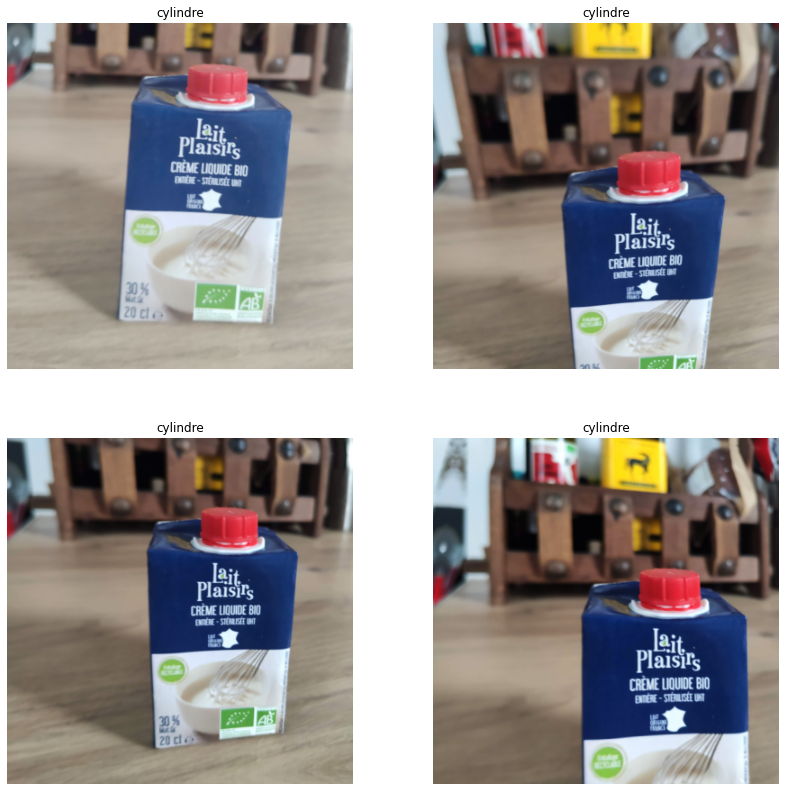

In [18]:
dls.show_batch(unique=True,figsize=(14,14))

In [19]:
len(dls.train)

118

In [20]:
len(dls.valid)

11

In [21]:
from torchvision import models

In [22]:
#learn = cnn_learner(dls, mansnet_fn, cut=-1, metrics=partial(accuracy_multi, thresh=0.5))
#learn = cnn_learner(dls, models.mobilenet_v2, cut=-1, pretrained=True,metrics=partial(accuracy_multi, thresh=0.5),cbs=[SaveModelCallback()])
learn = cnn_learner(dls,resnet18, pretrained=True,metrics=partial(accuracy_multi, thresh=0.5))#,cbs=[SaveModelCallback()])

In [ ]:
#learn.lr_find()
learn.path

In [ ]:
if False:
    import cProfile
    Pr=cProfile.Profile()
    Pr.enable()

    learn.lr_find()

    Pr.disable()
    Pr.print_stats('time')

In [ ]:
learn.fit_one_cycle(5, lr_max=slice(0.05))

In [ ]:
#learn.model

In [ ]:
learn.lr_find()

In [ ]:
learn.loss_func

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(15, lr_max=slice(1e-6))

In [ ]:
learn.show_results()

In [ ]:
#learn.load(r'C:\Users\Remi\Pictures\models\model')
learn.show_results()

In [ ]:
learn.predict(r'C:\Users\Remi\Pictures\DATASET-20210121T074943Z-001\DATASET\autres\fromage rapé\002\frigo\IMG_20210109_141927.jpg')

In [ ]:
learn.predict('/home/oem/Images/dataset_fridge/Dataset/Le beurre et l_argent du beurre /internet/beurre-bordier-demi-sel.jpg')

In [ ]:
learn.dls.vocab

In [29]:
obj2cat = {
    "thon":"conserve",
    
    "mayonnaise":"pot",
    "yaourt":"pot",
    "moutarde":"pot",
    
    "pateFeuilletee":"pate",
    "PateBrisee":"pate",
    
    "crème fraiche":"creme_ou_lait",
    "lait de vache":"creme_ou_lait",
    
    
    
    
    "oeufs":"oeuf",
    
    "chocolat noir":"cube_et_rectangle",
    
    "beurre":"beurre",
    "poulet":"cube_et_rectangle",
    "saussice":"cube_et_rectangle",
    
    "Fromage rapé":"fromage",
    "fromage comté":"fromage",
    
    "salade":"legume",
    "oranges":"legume",
    "peche":"legume",
    "poireau":"legume"    
}

In [30]:
source = f'/home/oem/Images/dataset_fridge'
files = get_image_files(source)
files = [f for f in files]

In [31]:
set_list = []
for f in files:
    for top in obj2cat.keys():
        print(f,top)
        if top in str(f):
            set_list.append(f)

/home/oem/Images/dataset_fridge/DATASET/autres/crème fraiche/002/table/IMG_20210117_100615.jpg thon
/home/oem/Images/dataset_fridge/DATASET/autres/crème fraiche/002/table/IMG_20210117_100615.jpg mayonnaise
/home/oem/Images/dataset_fridge/DATASET/autres/crème fraiche/002/table/IMG_20210117_100615.jpg yaourt
/home/oem/Images/dataset_fridge/DATASET/autres/crème fraiche/002/table/IMG_20210117_100615.jpg moutarde
/home/oem/Images/dataset_fridge/DATASET/autres/crème fraiche/002/table/IMG_20210117_100615.jpg pateFeuilletee
/home/oem/Images/dataset_fridge/DATASET/autres/crème fraiche/002/table/IMG_20210117_100615.jpg PateBrisee
/home/oem/Images/dataset_fridge/DATASET/autres/crème fraiche/002/table/IMG_20210117_100615.jpg crème fraiche
/home/oem/Images/dataset_fridge/DATASET/autres/crème fraiche/002/table/IMG_20210117_100615.jpg lait de vache
/home/oem/Images/dataset_fridge/DATASET/autres/crème fraiche/002/table/IMG_20210117_100615.jpg oeufs
/home/oem/Images/dataset_fridge/DATASET/autres/crème 

/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/002/occulte/IMG_20201230_145057.jpg poulet
/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/002/occulte/IMG_20201230_145057.jpg saussice
/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/002/occulte/IMG_20201230_145057.jpg Fromage rapé
/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/002/occulte/IMG_20201230_145057.jpg fromage comté
/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/002/occulte/IMG_20201230_145057.jpg salade
/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/002/occulte/IMG_20201230_145057.jpg oranges
/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/002/occulte/IMG_20201230_145057.jpg peche
/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/002/occulte/IMG_20201230_145057.jpg poireau
/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/002/occulte/IMG_20201230_145040.jpg thon
/home/oem/Images/datase

/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/007/frigo/IMG-20210114-WA0056.jpg fromage comté
/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/007/frigo/IMG-20210114-WA0056.jpg salade
/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/007/frigo/IMG-20210114-WA0056.jpg oranges
/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/007/frigo/IMG-20210114-WA0056.jpg peche
/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/007/frigo/IMG-20210114-WA0056.jpg poireau
/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/005/table/IMG20210116185153.jpg thon
/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/005/table/IMG20210116185153.jpg mayonnaise
/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/005/table/IMG20210116185153.jpg yaourt
/home/oem/Images/dataset_fridge/DATASET/autres/beurre/telephone/005/table/IMG20210116185153.jpg moutarde
/home/oem/Images/dataset_fridge/DATASET/autres/beur

/home/oem/Images/dataset_fridge/DATASET/autres/chocolat noir/001/20210112_203048.jpg saussice
/home/oem/Images/dataset_fridge/DATASET/autres/chocolat noir/001/20210112_203048.jpg Fromage rapé
/home/oem/Images/dataset_fridge/DATASET/autres/chocolat noir/001/20210112_203048.jpg fromage comté
/home/oem/Images/dataset_fridge/DATASET/autres/chocolat noir/001/20210112_203048.jpg salade
/home/oem/Images/dataset_fridge/DATASET/autres/chocolat noir/001/20210112_203048.jpg oranges
/home/oem/Images/dataset_fridge/DATASET/autres/chocolat noir/001/20210112_203048.jpg peche
/home/oem/Images/dataset_fridge/DATASET/autres/chocolat noir/001/20210112_203048.jpg poireau
/home/oem/Images/dataset_fridge/DATASET/autres/chocolat noir/001/20210112_203044.jpg thon
/home/oem/Images/dataset_fridge/DATASET/autres/chocolat noir/001/20210112_203044.jpg mayonnaise
/home/oem/Images/dataset_fridge/DATASET/autres/chocolat noir/001/20210112_203044.jpg yaourt
/home/oem/Images/dataset_fridge/DATASET/autres/chocolat noir/0

/home/oem/Images/dataset_fridge/DATASET/autres/yaourt/telephone/002/table/IMG-20210114-WA0058.jpg salade
/home/oem/Images/dataset_fridge/DATASET/autres/yaourt/telephone/002/table/IMG-20210114-WA0058.jpg oranges
/home/oem/Images/dataset_fridge/DATASET/autres/yaourt/telephone/002/table/IMG-20210114-WA0058.jpg peche
/home/oem/Images/dataset_fridge/DATASET/autres/yaourt/telephone/002/table/IMG-20210114-WA0058.jpg poireau
/home/oem/Images/dataset_fridge/DATASET/autres/yaourt/telephone/002/frigo/IMG-20210114-WA0063.jpg thon
/home/oem/Images/dataset_fridge/DATASET/autres/yaourt/telephone/002/frigo/IMG-20210114-WA0063.jpg mayonnaise
/home/oem/Images/dataset_fridge/DATASET/autres/yaourt/telephone/002/frigo/IMG-20210114-WA0063.jpg yaourt
/home/oem/Images/dataset_fridge/DATASET/autres/yaourt/telephone/002/frigo/IMG-20210114-WA0063.jpg moutarde
/home/oem/Images/dataset_fridge/DATASET/autres/yaourt/telephone/002/frigo/IMG-20210114-WA0063.jpg pateFeuilletee
/home/oem/Images/dataset_fridge/DATASET/au

/home/oem/Images/dataset_fridge/DATASET/autres/flocons d_avoine/000/table/139189965_499806527674431_5545772912895984584_n.jpg poireau
/home/oem/Images/dataset_fridge/DATASET/autres/flocons d_avoine/000/table/138838131_1302985130064382_6436121493638218949_n.jpg thon
/home/oem/Images/dataset_fridge/DATASET/autres/flocons d_avoine/000/table/138838131_1302985130064382_6436121493638218949_n.jpg mayonnaise
/home/oem/Images/dataset_fridge/DATASET/autres/flocons d_avoine/000/table/138838131_1302985130064382_6436121493638218949_n.jpg yaourt
/home/oem/Images/dataset_fridge/DATASET/autres/flocons d_avoine/000/table/138838131_1302985130064382_6436121493638218949_n.jpg moutarde
/home/oem/Images/dataset_fridge/DATASET/autres/flocons d_avoine/000/table/138838131_1302985130064382_6436121493638218949_n.jpg pateFeuilletee
/home/oem/Images/dataset_fridge/DATASET/autres/flocons d_avoine/000/table/138838131_1302985130064382_6436121493638218949_n.jpg PateBrisee
/home/oem/Images/dataset_fridge/DATASET/autres

/home/oem/Images/dataset_fridge/DATASET/autres/fromage boursin/000/table/IMG20210116185147.jpg yaourt
/home/oem/Images/dataset_fridge/DATASET/autres/fromage boursin/000/table/IMG20210116185147.jpg moutarde
/home/oem/Images/dataset_fridge/DATASET/autres/fromage boursin/000/table/IMG20210116185147.jpg pateFeuilletee
/home/oem/Images/dataset_fridge/DATASET/autres/fromage boursin/000/table/IMG20210116185147.jpg PateBrisee
/home/oem/Images/dataset_fridge/DATASET/autres/fromage boursin/000/table/IMG20210116185147.jpg crème fraiche
/home/oem/Images/dataset_fridge/DATASET/autres/fromage boursin/000/table/IMG20210116185147.jpg lait de vache
/home/oem/Images/dataset_fridge/DATASET/autres/fromage boursin/000/table/IMG20210116185147.jpg oeufs
/home/oem/Images/dataset_fridge/DATASET/autres/fromage boursin/000/table/IMG20210116185147.jpg chocolat noir
/home/oem/Images/dataset_fridge/DATASET/autres/fromage boursin/000/table/IMG20210116185147.jpg beurre
/home/oem/Images/dataset_fridge/DATASET/autres/f

/home/oem/Images/dataset_fridge/DATASET/autres/fromage rapé /004/frigo/IMG-20210120-WA0101.jpg crème fraiche
/home/oem/Images/dataset_fridge/DATASET/autres/fromage rapé /004/frigo/IMG-20210120-WA0101.jpg lait de vache
/home/oem/Images/dataset_fridge/DATASET/autres/fromage rapé /004/frigo/IMG-20210120-WA0101.jpg oeufs
/home/oem/Images/dataset_fridge/DATASET/autres/fromage rapé /004/frigo/IMG-20210120-WA0101.jpg chocolat noir
/home/oem/Images/dataset_fridge/DATASET/autres/fromage rapé /004/frigo/IMG-20210120-WA0101.jpg beurre
/home/oem/Images/dataset_fridge/DATASET/autres/fromage rapé /004/frigo/IMG-20210120-WA0101.jpg poulet
/home/oem/Images/dataset_fridge/DATASET/autres/fromage rapé /004/frigo/IMG-20210120-WA0101.jpg saussice
/home/oem/Images/dataset_fridge/DATASET/autres/fromage rapé /004/frigo/IMG-20210120-WA0101.jpg Fromage rapé
/home/oem/Images/dataset_fridge/DATASET/autres/fromage rapé /004/frigo/IMG-20210120-WA0101.jpg fromage comté
/home/oem/Images/dataset_fridge/DATASET/autres/

/home/oem/Images/dataset_fridge/DATASET/legumes/salade/001/table/IMG_20210114_222856.jpg fromage comté
/home/oem/Images/dataset_fridge/DATASET/legumes/salade/001/table/IMG_20210114_222856.jpg salade
/home/oem/Images/dataset_fridge/DATASET/legumes/salade/001/table/IMG_20210114_222856.jpg oranges
/home/oem/Images/dataset_fridge/DATASET/legumes/salade/001/table/IMG_20210114_222856.jpg peche
/home/oem/Images/dataset_fridge/DATASET/legumes/salade/001/table/IMG_20210114_222856.jpg poireau
/home/oem/Images/dataset_fridge/DATASET/legumes/salade/001/table/IMG_20210114_222859.jpg thon
/home/oem/Images/dataset_fridge/DATASET/legumes/salade/001/table/IMG_20210114_222859.jpg mayonnaise
/home/oem/Images/dataset_fridge/DATASET/legumes/salade/001/table/IMG_20210114_222859.jpg yaourt
/home/oem/Images/dataset_fridge/DATASET/legumes/salade/001/table/IMG_20210114_222859.jpg moutarde
/home/oem/Images/dataset_fridge/DATASET/legumes/salade/001/table/IMG_20210114_222859.jpg pateFeuilletee
/home/oem/Images/dat

/home/oem/Images/dataset_fridge/DATASET/viandes/Saumon/000/table/IMG_20210109_141641.jpg poulet
/home/oem/Images/dataset_fridge/DATASET/viandes/Saumon/000/table/IMG_20210109_141641.jpg saussice
/home/oem/Images/dataset_fridge/DATASET/viandes/Saumon/000/table/IMG_20210109_141641.jpg Fromage rapé
/home/oem/Images/dataset_fridge/DATASET/viandes/Saumon/000/table/IMG_20210109_141641.jpg fromage comté
/home/oem/Images/dataset_fridge/DATASET/viandes/Saumon/000/table/IMG_20210109_141641.jpg salade
/home/oem/Images/dataset_fridge/DATASET/viandes/Saumon/000/table/IMG_20210109_141641.jpg oranges
/home/oem/Images/dataset_fridge/DATASET/viandes/Saumon/000/table/IMG_20210109_141641.jpg peche
/home/oem/Images/dataset_fridge/DATASET/viandes/Saumon/000/table/IMG_20210109_141641.jpg poireau
/home/oem/Images/dataset_fridge/DATASET/viandes/Saumon/000/table/IMG_20210109_141625.jpg thon
/home/oem/Images/dataset_fridge/DATASET/viandes/Saumon/000/table/IMG_20210109_141625.jpg mayonnaise
/home/oem/Images/datas

/home/oem/Images/dataset_fridge/DATASET/viandes/oeufs/telephone/001/frigo/IMG_20201230_145234.jpg chocolat noir
/home/oem/Images/dataset_fridge/DATASET/viandes/oeufs/telephone/001/frigo/IMG_20201230_145234.jpg beurre
/home/oem/Images/dataset_fridge/DATASET/viandes/oeufs/telephone/001/frigo/IMG_20201230_145234.jpg poulet
/home/oem/Images/dataset_fridge/DATASET/viandes/oeufs/telephone/001/frigo/IMG_20201230_145234.jpg saussice
/home/oem/Images/dataset_fridge/DATASET/viandes/oeufs/telephone/001/frigo/IMG_20201230_145234.jpg Fromage rapé
/home/oem/Images/dataset_fridge/DATASET/viandes/oeufs/telephone/001/frigo/IMG_20201230_145234.jpg fromage comté
/home/oem/Images/dataset_fridge/DATASET/viandes/oeufs/telephone/001/frigo/IMG_20201230_145234.jpg salade
/home/oem/Images/dataset_fridge/DATASET/viandes/oeufs/telephone/001/frigo/IMG_20201230_145234.jpg oranges
/home/oem/Images/dataset_fridge/DATASET/viandes/oeufs/telephone/001/frigo/IMG_20201230_145234.jpg peche
/home/oem/Images/dataset_fridge/D

/home/oem/Images/dataset_fridge/DATASET/viandes/saucisse/telephone/001/table/IMG-20210112-WA0004.jpg peche
/home/oem/Images/dataset_fridge/DATASET/viandes/saucisse/telephone/001/table/IMG-20210112-WA0004.jpg poireau
/home/oem/Images/dataset_fridge/DATASET/viandes/saucisse/telephone/001/table/IMG-20210112-WA0017.jpg thon
/home/oem/Images/dataset_fridge/DATASET/viandes/saucisse/telephone/001/table/IMG-20210112-WA0017.jpg mayonnaise
/home/oem/Images/dataset_fridge/DATASET/viandes/saucisse/telephone/001/table/IMG-20210112-WA0017.jpg yaourt
/home/oem/Images/dataset_fridge/DATASET/viandes/saucisse/telephone/001/table/IMG-20210112-WA0017.jpg moutarde
/home/oem/Images/dataset_fridge/DATASET/viandes/saucisse/telephone/001/table/IMG-20210112-WA0017.jpg pateFeuilletee
/home/oem/Images/dataset_fridge/DATASET/viandes/saucisse/telephone/001/table/IMG-20210112-WA0017.jpg PateBrisee
/home/oem/Images/dataset_fridge/DATASET/viandes/saucisse/telephone/001/table/IMG-20210112-WA0017.jpg crème fraiche
/home

/home/oem/Images/dataset_fridge/DATASET/viandes/sardines/000/stockage/20210112_203009.jpg yaourt
/home/oem/Images/dataset_fridge/DATASET/viandes/sardines/000/stockage/20210112_203009.jpg moutarde
/home/oem/Images/dataset_fridge/DATASET/viandes/sardines/000/stockage/20210112_203009.jpg pateFeuilletee
/home/oem/Images/dataset_fridge/DATASET/viandes/sardines/000/stockage/20210112_203009.jpg PateBrisee
/home/oem/Images/dataset_fridge/DATASET/viandes/sardines/000/stockage/20210112_203009.jpg crème fraiche
/home/oem/Images/dataset_fridge/DATASET/viandes/sardines/000/stockage/20210112_203009.jpg lait de vache
/home/oem/Images/dataset_fridge/DATASET/viandes/sardines/000/stockage/20210112_203009.jpg oeufs
/home/oem/Images/dataset_fridge/DATASET/viandes/sardines/000/stockage/20210112_203009.jpg chocolat noir
/home/oem/Images/dataset_fridge/DATASET/viandes/sardines/000/stockage/20210112_203009.jpg beurre
/home/oem/Images/dataset_fridge/DATASET/viandes/sardines/000/stockage/20210112_203009.jpg pou

/home/oem/Images/dataset_fridge/DATASET/fruits/pomme/000/table/20210112_202124.jpg lait de vache
/home/oem/Images/dataset_fridge/DATASET/fruits/pomme/000/table/20210112_202124.jpg oeufs
/home/oem/Images/dataset_fridge/DATASET/fruits/pomme/000/table/20210112_202124.jpg chocolat noir
/home/oem/Images/dataset_fridge/DATASET/fruits/pomme/000/table/20210112_202124.jpg beurre
/home/oem/Images/dataset_fridge/DATASET/fruits/pomme/000/table/20210112_202124.jpg poulet
/home/oem/Images/dataset_fridge/DATASET/fruits/pomme/000/table/20210112_202124.jpg saussice
/home/oem/Images/dataset_fridge/DATASET/fruits/pomme/000/table/20210112_202124.jpg Fromage rapé
/home/oem/Images/dataset_fridge/DATASET/fruits/pomme/000/table/20210112_202124.jpg fromage comté
/home/oem/Images/dataset_fridge/DATASET/fruits/pomme/000/table/20210112_202124.jpg salade
/home/oem/Images/dataset_fridge/DATASET/fruits/pomme/000/table/20210112_202124.jpg oranges
/home/oem/Images/dataset_fridge/DATASET/fruits/pomme/000/table/20210112

In [32]:
def label_func(f): 
    #print(f)
    categorie = str(f).split("/")[7]#.replace(" ","_")
    return obj2cat[categorie]

In [33]:
#def label_func(x): return x.parent.parent.parent.name

In [34]:
label_func(set_list[0])

'creme_ou_lait'

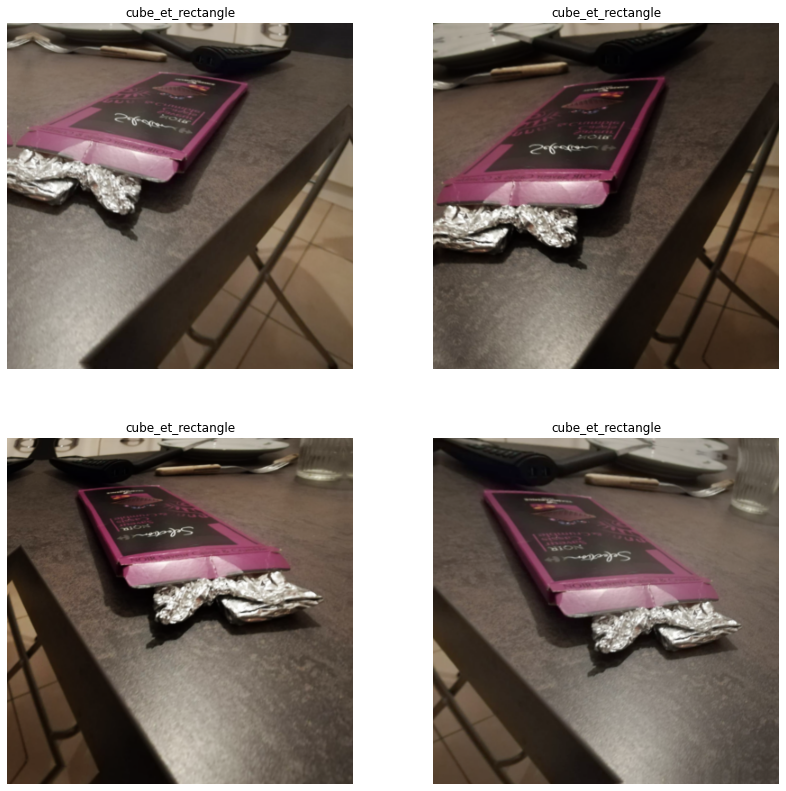

In [108]:
dls = ImageDataLoaders.from_path_func(source, set_list, label_func, bs= 4, item_tfms=Resize(224*2),batch_tfms=aug_transforms(size=int(128*3)),workers=-1)
#dls = ImageDataLoaders.from_df(df_marks[2:],path = r'/home/oem/Images/dataset_fridge/DATASET', valid_col='is_valid', label_delim=' ',
#                               item_tfms=Resize(128*2), bs=4, num_workers=4, batch_tfms=aug_transforms(size=int(128*1.5)))

dls.show_batch(unique=True,figsize=(14,14))

In [110]:
def top_2_accuracy(inp, targ, k=5, axis=-1):
    return top_k_accuracy(inp, targ, k=2, axis=-1)

In [111]:
learn = cnn_learner(dls, resnet18, metrics=[accuracy,error_rate,top_2_accuracy])

In [112]:
len(dls.train)

103

In [113]:
len(dls.valid)

26

In [122]:
#learn.model
#learn.lr_find()

In [117]:
#import cProfile
#Pr=cProfile.Profile()
#Pr.enable()

learn.fine_tune(15,    base_lr=0.004)

#Pr.disable()
#Pr.print_stats('time')

epoch,train_loss,valid_loss,accuracy,error_rate,top_2_accuracy,time
0,1.853816,1.457542,0.543689,0.456311,0.747573,01:10


epoch,train_loss,valid_loss,accuracy,error_rate,top_2_accuracy,time
0,1.707196,1.086295,0.679612,0.320388,0.825243,01:21
1,1.144780,0.813974,0.757282,0.242718,0.883495,01:21
2,1.320158,1.048959,0.708738,0.291262,0.873786,01:23
3,1.287750,0.995626,0.689320,0.310680,0.805825,01:21
4,1.358831,0.860364,0.737864,0.262136,0.854369,01:25
5,1.238180,0.611593,0.805825,0.194175,0.941748,01:25
6,1.209447,0.867423,0.766990,0.233010,0.864078,01:32
7,1.054433,0.575145,0.883495,0.116505,0.941748,01:31
8,0.917645,0.558366,0.844660,0.155340,0.912621,01:27
9,0.755944,0.429067,0.883495,0.116505,0.932039,01:30


In [ ]:
#[str(learn.dls.vocab).index(x) for x in ['beurre','fromage']]

In [118]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

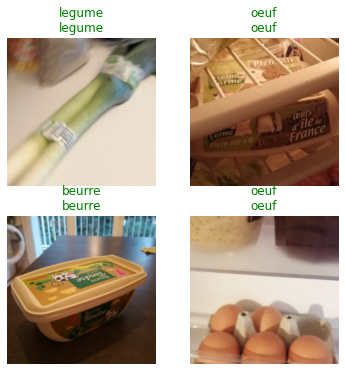

In [119]:
learn.show_results()

In [120]:
inter = ClassificationInterpretation.from_learner(learn)

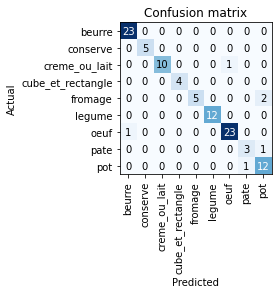

In [121]:
inter.plot_confusion_matrix()

In [34]:
23/(23+17+2+10+5+10+7+14+3+4+3)

0.23469387755102042

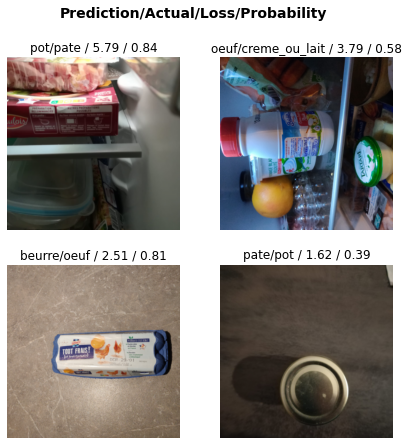

In [124]:
inter.plot_top_losses(4,figsize=(7,7))